Data Analytics Immersion Exercise 4.9 Part 2

Creating visualizations

    Histogram – Orders by hour
	
    Bar Chart – Loyalty

Splitting data set into small and large for useability

Line chart average order price by hour

Line chart average amount of dependants by age

Scatterplot of income by age

In [2]:
#Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import scipy

In [3]:
#Setting path

path = r"C:\Users\luiss\OneDrive\Career Foundry\Instacart Basket Analysis"

In [4]:
#Importing data

df_tot = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'total.pkl'))

In [16]:
#Checking data

df_tot.shape

(32406041, 32)

In [8]:
df_tot.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Surname,Gender,STATE,Age,date_joined,dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

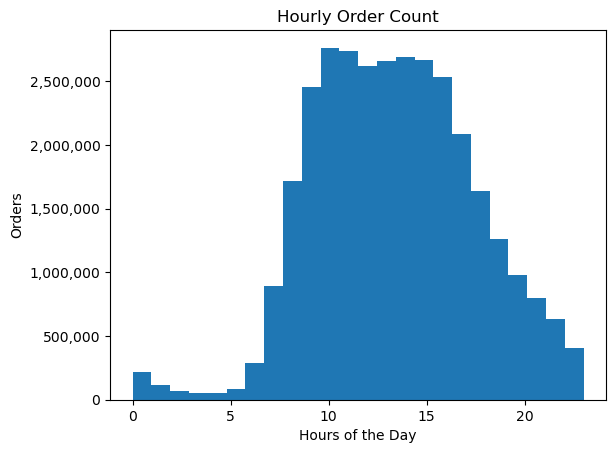

In [7]:
#Creating histogram of orders during the day

Hist_order_hour_of_day = df_tot['order_hour_of_day'].plot.hist(bins = 24)

#Labeling histogram
plt.title('Hourly Order Count')
plt.ylabel('Orders')
plt.xlabel('Hours of the Day')

#Removing scientific notation
Hist_order_hour_of_day.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

The above histogram demonstrates that orders start increasing rapidly at 6am, peaking from 9am to 4pm, gradually decreasing from there.

In [8]:
#Exporting histogram

Hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

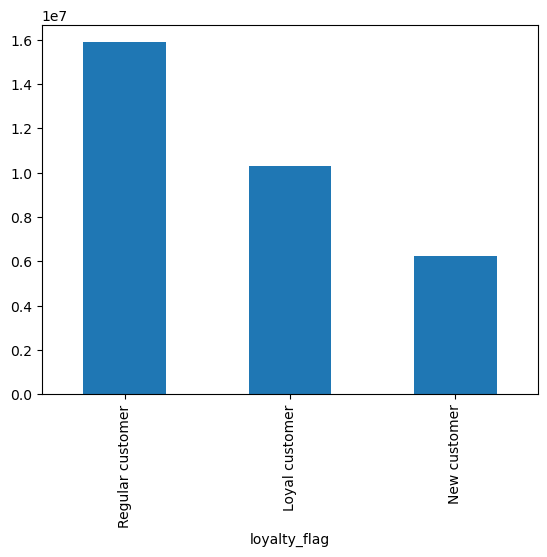

In [20]:
#Creating loyalty bar chart

loy_bar = df_tot['loyalty_flag'].value_counts().plot.bar()

In [21]:
df_tot['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    15877395
Loyal customer      10284396
New customer         6244250
Name: count, dtype: int64

In [6]:
#Rearranging x-axis of bar chart

custom_order = ['New customer', 'Regular customer', 'Loyal customer']

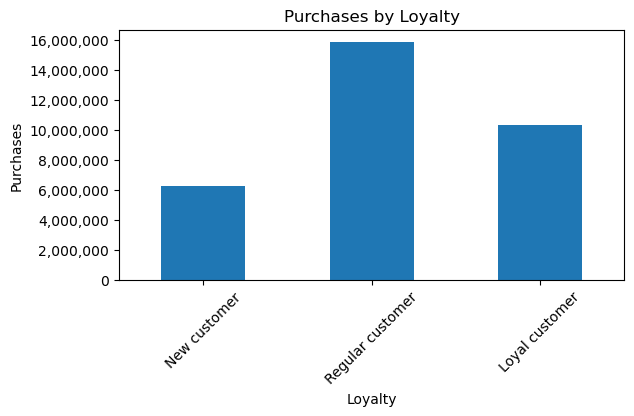

In [10]:
#Creating Bar Chart
loy_bar = df_tot['loyalty_flag'].value_counts().reindex(custom_order).plot.bar()

#Labeling and customizing
plt.title('Purchases by Loyalty')
plt.ylabel('Purchases')
plt.xlabel('Loyalty')
plt.xticks(rotation = 45)
plt.tight_layout(pad=3)

#Removing scientific notation
loy_bar.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

#Exporting chart
loy_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loy_bar.png'))

The bar chart displays that regular customers make up for more orders than loyal or new customers, accounting for nearly 50% of orders.

Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [17]:
#Creating sample of data for line chart
#Setting seed

np.random.seed(4)

In [18]:
#Splitting data into a 70/30 split for useability

dev = np.random.rand(len(df_tot)) <= 0.7

In [19]:
#Splitting data frame into big(70%) and small(30%)

big = df_tot[dev]

In [20]:
small = df_tot[~dev]

In [17]:
#verifying size of big and small to total

len(df_tot)

32406041

In [18]:
len(big) + len(small)

32406041

In [21]:
#Simplifying df_tot to relevant columns (prices and hour of day) for line chart

df_totph = small[['order_id', 'prices', 'order_hour_of_day']]

In [22]:
#Checking new data

df_totph.head()

,order_id,prices,order_hour_of_day
0,2539329,9.0,8
2,2539329,4.4,8
3,2539329,4.7,8
6,2398795,3.0,7
10,2398795,4.0,7


In [29]:
df_totph.shape

(9721457, 3)

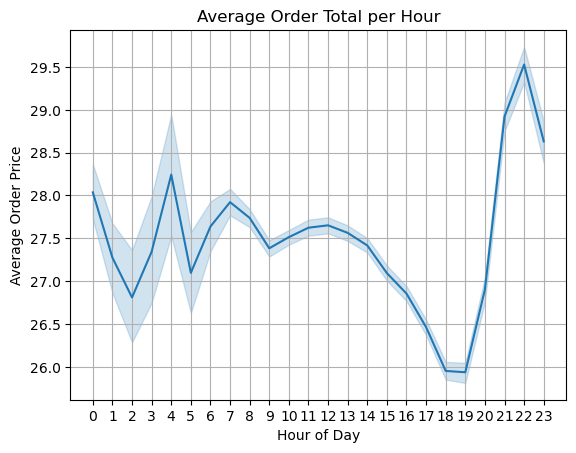

In [47]:
#Creating Line chart depicting average cost of order by hour of day
#Creating copy of data
df_totph = df_totph.copy()

#Using groupby to find total price per order
df_totph['Order Price'] = df_totph.groupby('order_id')['prices'].transform('sum')

#Creating smaller subset
df_line = df_totph[['order_id', 'Order Price', 'order_hour_of_day']]

#Removing duplicates
df_line = df_line.drop_duplicates()

#Creating line chart
line_orderspend = sns.lineplot(data = df_line, x = 'order_hour_of_day', y = 'Order Price')

#Labeling
plt.title('Average Order Total per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Order Price')
plt.xticks(range(0, 24))
plt.grid(True)

#Exporting
line_orderspend.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Order Price by Hour.png'))

In [ ]:
#Creating line chart displaying expenditure by hour of day
line_ph = sns.lineplot(data = df_totph, x = 'order_hour_of_day', y = 'prices')

In [39]:
#Exporting line chart

line_ph.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line prices by hour.png'))

This line chart indicates that prices spike at 5am, but looking at the parameters of the y-axis, spike seems like a strong word.  I know about the concept of economy of scale, but the 5am spike shows a large error band as it is, which leads me to believe that time of day does not have a strong effect on the prices of items.

Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [23]:
#Using same 70/30 split as before, creating new df comprising of relevant columns

df_totad = small[['Age', 'dependants']]

In [41]:
#Checking new df

df_totad.head()

,Age,dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


In [42]:
df_totad.shape

(9721457, 2)

Text(0.5, 1.0, 'Average Amount of Dependants by Age')

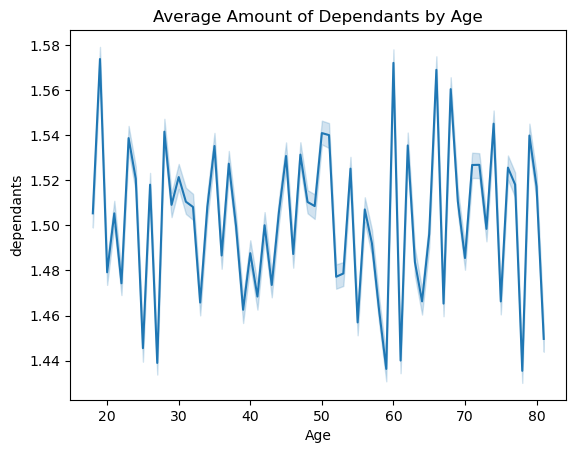

In [24]:
#Creating line chart of age v dependants

line_ad = sns.lineplot(data = df_totad, x = 'Age', y = 'dependants')

plt.title('Average Amount of Dependants by Age')

There's a lot of variability in the data and the dependants axis range is tight enough to state age does not seem to have an affect on the number of dependants.

In [25]:
#Exporting chart

line_ad.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line chart age v dependants.png'))

You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

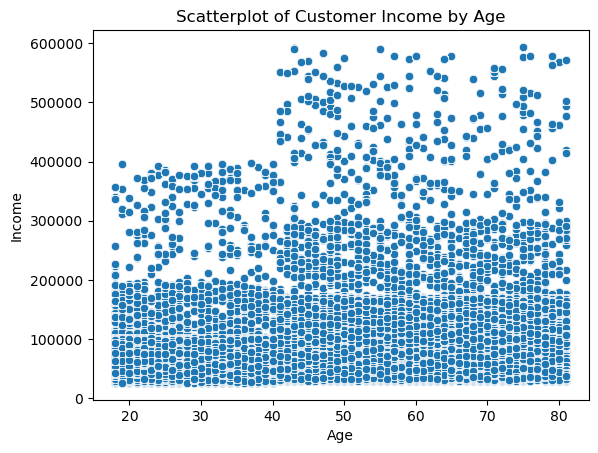

In [27]:
#creating scatterplot between age and income
scatter_age_income = sns.scatterplot(x = 'Age', y = 'income', data = df_tot)

#Labeling
plt.title('Scatterplot of Customer Income by Age')
plt.ylabel('Income')

#Exporting graph
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot age v income.png'))

There's a sharp increase in larger incomes starting at age 40